# Introduction

> Using APIs as a clean interface between the analytics and the application that makes use of them allows for faster product development and reusability of developed models in multiple applications.

> ***Streamlit*** is an awesome new tool that allows engineers to quickly build highly interactive web applications around their data, machine learning models, and pretty much anything, without need of any web development.

* API has been designed to test three models; MobileNet v2, ResNet-18 and VGG-16.

* Make sure to create file name **streamlit.py** in working directory.

* Web-page starts to be local hosted, after you run the last cell.

* *Click* on the provided link, Pass through the Tunnel page and there you go to your desired page.


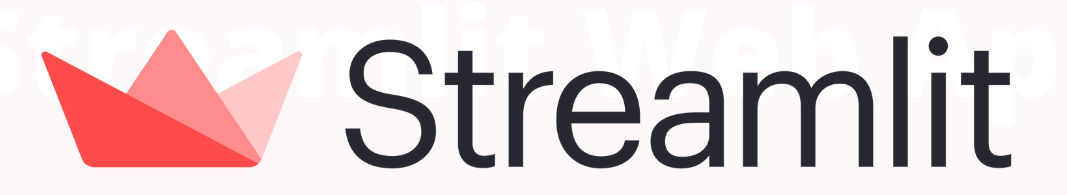

# Importing Packages

At first, we need to import some packages for implementation.

In [32]:
!pip install -q streamlit


In [33]:
!pip install --upgrade pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://b30a-35-230-28-197.ngrok.io" -> "http://localhost:80">

# Setting Front End

> Make sure to create a file named ***streamlit_app,py*** in the working directory and then run the following code.

In [35]:
%%writefile /content/streamlit_app.py
from PIL import Image
import streamlit as st
import torch
import numpy as np
import time
from torchvision import transforms
import torch.nn.functional as F
model = torch.load("/content/drive/MyDrive/data/mobilenet.pt")
model1 = torch.load("/content/drive/MyDrive/data/resnet18.pt")
model2 = torch.load("/content/drive/MyDrive/data/VGG.pt")
st.set_page_config(
     page_title="CatvsDogClassifier",
     layout="wide",
 )
with st.sidebar:
 st.header("MODEL DETAILS", )
 st.text(" FrameWork Used : PYTORCH")
 st.subheader("PreTrained Model: MOBILENET v2")
 st.text("✔️ Total Mismatched : 8")
 st.text("✔️ F1_SCORE : 0.973")
 st.text("✔️ Memory Size : 14 MB")
 st.subheader("PreTrained Model: RESNET-18")
 st.text("✔️ Total Mismatched : 9")
 st.text("✔️ F1_SCORE : 0.97")
 st.text("✔️ Memory Size : 45 MB")
 st.subheader("PreTrained Model: VGG-16")
 st.text("✔️ Total Mismatched : 8")
 st.text("✔️ F1_SCORE : 0.973")
 st.text("✔️ Memory Size : 528 MB")

st.header("Image Classification using Transfer Learning", )
st.subheader("Dataset Images - Cats & Dogs")
tab1, tab2, tab3= st.tabs(["📈  MOBILENET v2 ", "🗃   RESNET-18", "🗃   VGG-16"])

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
uploaded_file = tab1.file_uploader("Choose a file of either a Cat or Dog")
uploaded_file2 = tab2.file_uploader("Choose a Image of either a Cat or Dog")
uploaded_file3 = tab3.file_uploader("Choose a Picture of either a Cat or Dog")

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transf= transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

if uploaded_file is not None:
  image = Image.open(uploaded_file)
  since = time.time()
  img = transf(image)
  img = img.unsqueeze(0)
  img = img.to(device)
  pred=model(img)
  pred1 = F.softmax(pred, dim=1)[:, 1]
  pred2 = pred1[0] > 0.55
  col1, col2 = tab1.columns(2)
  with col1:
   if pred2==1:
     col1.success(" 🐈 🐈 🐈  PREDICTION = CAT  🐈 🐈 🐈 ")
     col1.text('=>   Probability : {:4f}'.format(pred1.item()))
   else:
     col1.success(" 🐶 🐶 🐶  PREDICTION = DOG  🐶 🐶 🐶")
     col1.text('=>   Probability : {:4f}'.format(1 - pred1.item()))
   time_elapsed = time.time() - since
   col1.text('=>   Inference Time: {:4f}'.format(
        time_elapsed))
  with col2:
   col2.image(image, width = 280)

if uploaded_file2 is not None:
  image = Image.open(uploaded_file2)
  since = time.time()
  img = transf(image)
  img = img.unsqueeze(0)
  img = img.to(device)
  pred=model1(img)
  pred1 = F.softmax(pred, dim=1)[:, 1]
  pred2 = pred1[0] > 0.55
  col1, col2 = tab2.columns(2)
  with col1:
   if pred2==1:
     col1.success(" 🐈 🐈 🐈  PREDICTION = CAT  🐈 🐈 🐈 ")
     col1.text('=>   Probability : {:4f}'.format(pred1.item()))
   else:
     col1.success(" 🐶 🐶 🐶  PREDICTION = DOG  🐶 🐶 🐶")
     col1.text('=>   Probability : {:4f}'.format(1 - pred1.item()))
   time_elapsed = time.time() - since
   col1.text('=>   Inference Time: {:4f}'.format(
        time_elapsed))
  with col2:
   col2.image(image, width = 280)

if uploaded_file3 is not None:
  image = Image.open(uploaded_file3)
  since = time.time()
  img = transf(image)
  img = img.unsqueeze(0)
  img = img.to(device)
  pred=model2(img)
  pred1 = F.softmax(pred, dim=1)[:, 1]
  pred2 = pred1[0] > 0.55
  col1, col2 = tab3.columns(2)
  with col1:
   if pred2==1:
     col1.success(" 🐈 🐈 🐈  PREDICTION = CAT  🐈 🐈 🐈 ")
     col1.text('=>   Probability : {:4f}'.format(pred1.item()))
   else:
     col1.success(" 🐶 🐶 🐶  PREDICTION = DOG  🐶 🐶 🐶")
     col1.text('=>   Probability : {:4f}'.format(1 - pred1.item()))
   time_elapsed = time.time() - since
   col1.text('=>   Inference Time: {:4f}'.format(
        time_elapsed))
  with col2:
   col2.image(image, width = 280)



Overwriting /content/streamlit_app.py


# Start Hosting API

In [36]:
!streamlit run '/content/streamlit_app.py' & npx localtunnel --port 8501

2022-09-06 07:24:16.924 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.178s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.230.28.197:8501

your url is: https://ten-months-switch-35-230-28-197.loca.lt
  Stopping...
^C
